## 로지스틱 회귀
- 선형회귀에서 출발
- 이진 분류 문제 해결
- 클래스 확률 예측
- 딥러닝에서도 사용됨

p177
- x가 사각형일 확률 30%
- y가 삼각형일 확률 50%
- x가 원일 확률 20%

## 데이터 불러오기
- Species (종속변수=Y) -> 타깃
- 독립변수 : Weight, Length, Diagonal, Height, Width -> 입력 데이터

- 파이썬을 통해 데이터 분석을 할 때, Pandas를 빼놓고 이야기할 수 없다. 온전히 통계 분석을 위해 고안된 R 과는 다르게 python은 일반적인 프로그래밍 언어(general purpose programming language) 이며, 데이터 분석을 하기 위해서는 여러가지 라이브러리를 사용할 수 밖에 없다. 이 패키지들 중 R의 dataframe 데이터 타입을 참고하여 만든 것이 바로 pandas dataframe이다. pandas는 dataframe을 주로 다루기 위한 라이브러리이며, dataframe을 자유롭게 가공하는 것은 데이터 과학자들에게 중요하다. 

- 데이터 프레임은 넘파이로 상호변환이 쉽고, 사이런킷과도 잘 호환된다

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## 데이터 탐색 (실제작업시 시간소요)

In [ ]:
# 종속변수
print(pd.unique(fish['Species'])) #unique():데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
print(fish['Species'].value_counts())

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


## 데이터 가공

In [ ]:
# 입력데이터 만들기
# 데이터프레임에서 여러열을 선택하면 새로운 데이터 프레임이 반환되며, 이를 to_numpy()메서드로 넘파이 배열로 바꾼다
fish_input = fish[['Weight', 'Length','Diagonal','Height','Width' ]].to_numpy() 
fish_input.shape

(159, 5)

In [ ]:
print(fish_input[:5]) #[:5] : 처음 5개 행

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# 타깃데이터 만들기
fish_target = fish['Species'].to_numpy() # ['Species'] : [['Species']]사용하지 않도록 주의, 그렇게 하면 fish_target이 2차원 배열이 됨 **

## 데이터 분리

In [ ]:
# 데이터 세트 2개 만들기 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

# 층화 샘플링

## 표준화 전처리 
- 여기에서도 훈련 세트의 통계 값으로 테스트 세트를 변환해야 한다는 점을 잊지 않기 **
- 데이터 가공
 + 숫자 결측치가 존재, 평균값으로 대체
 + 원본 데이터 평균 대치 (x) > 훈련 데이터로 평균대치 (o)
 + 훈련 데이터와 테스트 데이터 분리
- 데이터 누수(Data Leakage)
 + 훈련데이터 평균값 70을 대치 (o)
 + 테스트데이터 평균값 75를 대치 (x)
 + 모든 데이터 평균값 72.5를 대치 (x)

 참고 사이트 
 https://scikit-learn.org/stable/common_pitfalls.html 

참고 코드 (무조건 pipeline 으로 사용: 중간에 복잡한 내용없이 안전하게 실행가능) : Data Leakage 방지가능
  
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

mean_squared_error(y_test, model.predict(X_test))
0.90...


- Pipelines also help avoiding another common pitfall: leaking the test data into the training data.

교재 p97
- 기준을 맞춰라 --> 데이터 표준화(표준점수)
- 수동으로 mean, std

In [ ]:
# p100
# train_scaled = (train_input - mean)/std

StandardScaler() 참고 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# StandardScaler 클래스 사용하여 훈련세트와 데이터세트를 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
# ss.fit(test_input) (x)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 모형 만들기
- k-최근접 이웃
- 보통 1개의 모형만 만들지는 않음 / 여러개의 샘플링

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 타깃값 확인
- 알파벳 순으로 정렬

In [ ]:
print(kn.classes_) 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- 5개 샘플에 대한 예측은 어떤 확률인가?

In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #predict_proba()메서드: 클래스별 확률값 반환 

#round()함수는 기본으로 소수점 첫째자리에서 반올림, decimals 매개변수로 유지할 소수점 아래자릿수 지정가능
print(np.round(proba, decimals=4)) 

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- 첫 번째 클래스 Perch
 +100% 확률로 Perch 예측
- 네번째 클래스 Perch
 + 66.7% 확률로 Perch로 예측
 + 33.3% 확률로 Perch로 예측

## 회귀식
y = ax + b
- 양변에 로그를 취함


## 로지스틱회귀

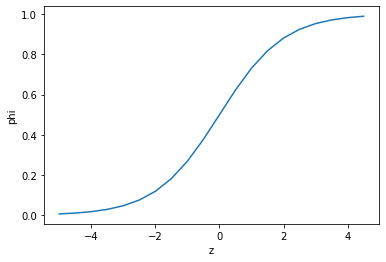

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.5)
phi = 1/(1+np.exp(-z)) #np.exp 지수함수계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행

In [ ]:
# 넘파이배열은 True, False값을 전달하여 행을 선택 
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # | : OR연산자 / bream_smelt_indexes배열: 도미와 빙어일경우 True, 그외에는 모두 False
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

train_scaled.shape, train_bream_smelt.shape

((119, 5), (33, 5))

## 모델 만들기 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)


LogisticRegression()

In [ ]:
# 클래스를 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


- 확률값 구하기 

In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


- 분류기준: threshold 임계값 설정 (경계선을 긋는)


계수와 절편

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- z값을 확률값으로 변환

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 다중 분류 수행하기
- 이진분류의 확장판

In [ ]:
# 하이퍼 파라미터 세팅
# 모형을 튜닝
# 모형 결과의 과대적합 또는 과소적합을 방지하기 위한 것

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- 다중 분류일 경우 선형 방정식은 어떤 모습일까?
- 분류 7개, 칼럼 값 5개

In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis =1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


교재에는 관련 내용없음

## 평가 지표 (실제 평가시 이용)
- 회귀 평가지표
- 결정 계수 (p121)
 + (타깃-예측)^2의 합 / (타깃-평균)^2의 합
- MAE, MSE, RMSE
 + (실제 - 예측)= 오차
 + MAE(Mean Absoluted Error) : 오차의 절댓값의 평균
 + MES(Meen Squared Error) : 오차 제곱의 평균
 + RMSE(Root Mean Squared Error):MSE에 제곱근을 취한 값

- 좋은 모델이란?
 + 결정계수 : 1에 수렴하면 좋은 모델
 + MAE, MSE, RMSE : 0에 수렴하면 좋은 모델

참고
 https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

true = np.array([1, 2, 3, 2, 3, 5, 4, 6, 5, 6, 7, 8, 8]) # 실제값
preds = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 7, 7, 6, 8]) # 예측값

#절대값 오차의 평균
mae = mean_absolute_error(true, preds)
print(mae)

#제곱 오차의 평균
mse = mean_squared_error(true, preds)
print(mse)

# mse제곱근
rmse = np.sqrt(mse)
print(rmse)

# 결정계수
r2 = r2_score(true, preds)
print(r2)


0.5384615384615384
0.6923076923076923
0.8320502943378437
0.8617021276595744


## 분류 평가 지표 
- 오차 행렬
- 실제 값
 + [빙어, 도미, 도미, 빙어, 도미]
 + [빙어, 빙어, 도미, 빙어, 빙어]  


TP(빙어를 빙어로 예측) : 2
TN(도미를 도미로 예측) : 1
FN(실제 도미, 예측 빙어) : 2
FP(실제 빙어, 예측 도미) : 0

- TP, TN, FP, FN
 + TP=5, TN=5, FP=3, FN=7
 + 정확도 :(TP+TN)/(TP+TN+FP+FN)
 + 정밀도 : 양성이라고 예측한 값(TP+FP)중 실제 양성인 값의 비율
 + 재현율 : 실제 양성인 값 중에서 양성으로 예측한 값(TP)의 비율
   - 코로나검사
    + 양성(1) : 음성(99)
    + 머신러닝 모형 : 정확도 98% / 정밀도 99%
    + 인간 음성진단 : 정확도 99% / 정밀도 95%
  - 검사자가 실제는 양성, 진단은 음성으로 내림

 + 로그손실 
 + ROC Curve (=AUC)

- 정밀도, 재현율 : 타깃데이터가 불안정시/ 정확도 확인어려울시 



- 모형의 정확도 3/5 = 60%

분류 모델 평가방법 참고 

https://velog.io/@skyepodium/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80-%EB%B0%A9%EB%B2%95



In [ ]:
from sklearn.metrics import confusion_matrix

true = [0,1,1,0,0]
pred = [1,0,0,0,0]

confusion_matrix(true, pred)

array([[2, 1],
       [2, 0]])